In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

df =  pd.read_csv('conversion_data.csv')

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Take-home challenge/1.Conversion Rate/conversion_data.csv'

In [5]:
df = pd.read_csv(path)
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
df.shape

(316200, 6)

In [7]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [8]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [9]:
df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [10]:
sorted(df['age'].unique(), reverse = True)[:5]

[123, 111, 79, 77, 73]

In [11]:
df_1 = df[df['age']<=79]
df_1.shape

(316198, 6)

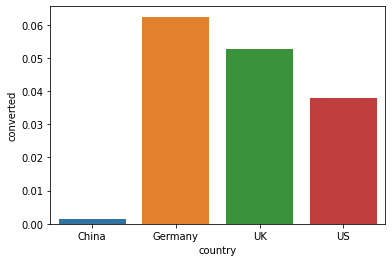

In [12]:
country_con = df_1[['country', 'converted']].groupby('country').mean().reset_index()   #reset_index(), make country become a column, instead of index，otherwise can't be plotted
sns.barplot(data=country_con, x='country', y='converted')

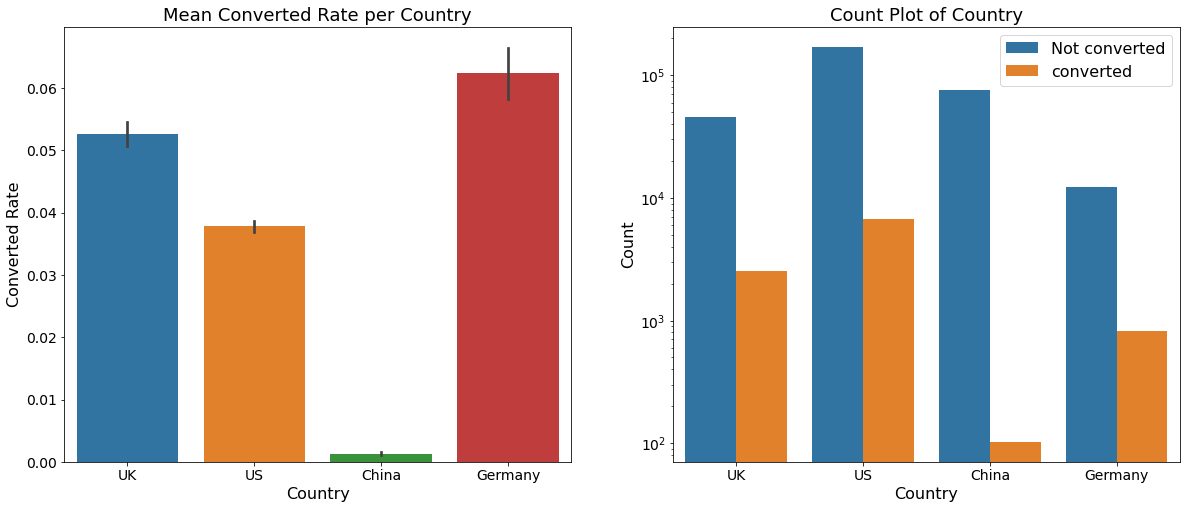

In [13]:
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (20,8))

sns.barplot(x='country', y='converted', data=df_1, ax=ax[0])
ax[0].set_title('Mean Converted Rate per Country', fontsize=18)
ax[0].set_xlabel('Country', fontsize =16)
ax[0].set_ylabel('Converted Rate', fontsize =16)
ax[0].tick_params(axis='both', labelsize=14)
sns.countplot(data=df_1, x='country', hue='converted', ax=ax[1])
ax[1].set_title('Count Plot of Country', fontsize=18)
ax[1].set_xlabel('Country', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].set_yscale('log')
ax[1].legend(labels = ['Not converted', 'converted'], fontsize=16)
plt.show()

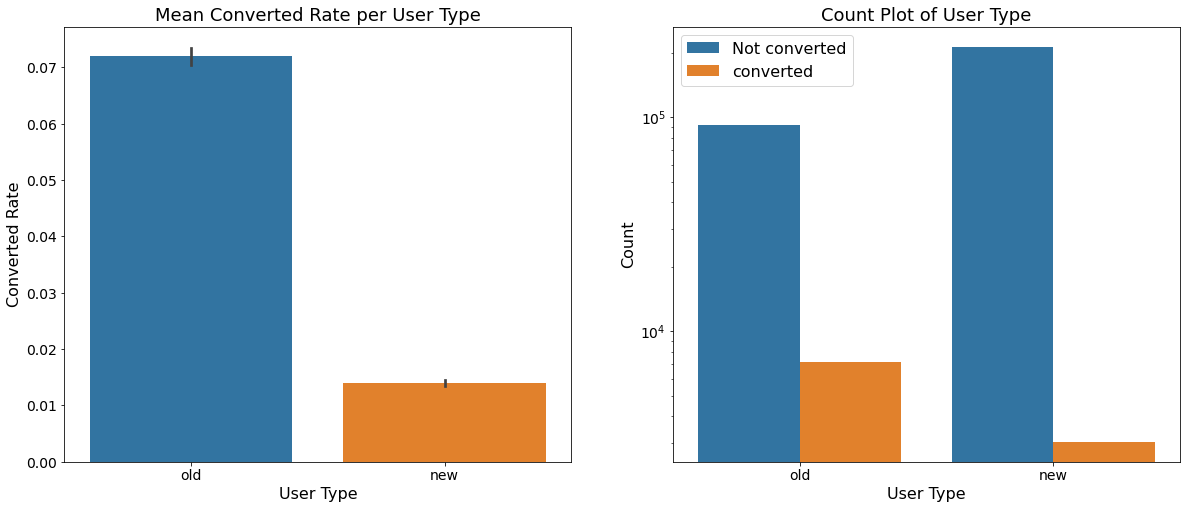

In [14]:
#Visiualization of Different User Type
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (20,8))

sns.barplot(x='new_user', y='converted', data=df_1, ax=ax[0])
ax[0].set_title('Mean Converted Rate per User Type', fontsize=18)
ax[0].set_xlabel('User Type', fontsize =16)
ax[0].set_ylabel('Converted Rate', fontsize =16)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].set_xticklabels(labels = ['old', 'new'])
sns.countplot(data=df_1, x='new_user', hue='converted', ax=ax[1])
ax[1].set_title('Count Plot of User Type', fontsize=18)
ax[1].set_xlabel('User Type', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].legend(labels = ['Not converted', 'converted'], fontsize=16)
ax[1].set_xticklabels(labels=['old', 'new'])
ax[1].set_yscale('log')
plt.show()

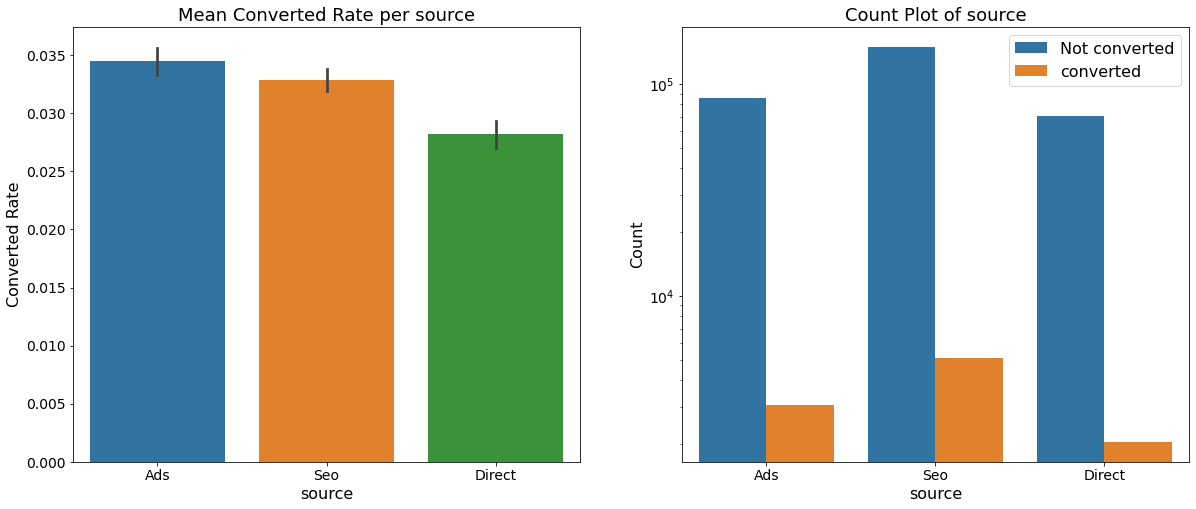

In [15]:
#Visiualization of Different Source
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (20,8))

sns.barplot(x='source', y='converted', data=df_1, ax=ax[0])
ax[0].set_title('Mean Converted Rate per source', fontsize=18)
ax[0].set_xlabel('source', fontsize =16)
ax[0].set_ylabel('Converted Rate', fontsize =16)
ax[0].tick_params(axis='both', labelsize=14)
sns.countplot(data=df_1, x='source', hue='converted', ax=ax[1])
ax[1].set_title('Count Plot of source', fontsize=18)
ax[1].set_xlabel('source', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].legend(labels = ['Not converted', 'converted'], fontsize=16)
ax[1].set_yscale('log')
plt.show()

In [16]:
age_group = df_1[['age','converted']].groupby('age').mean().reset_index()

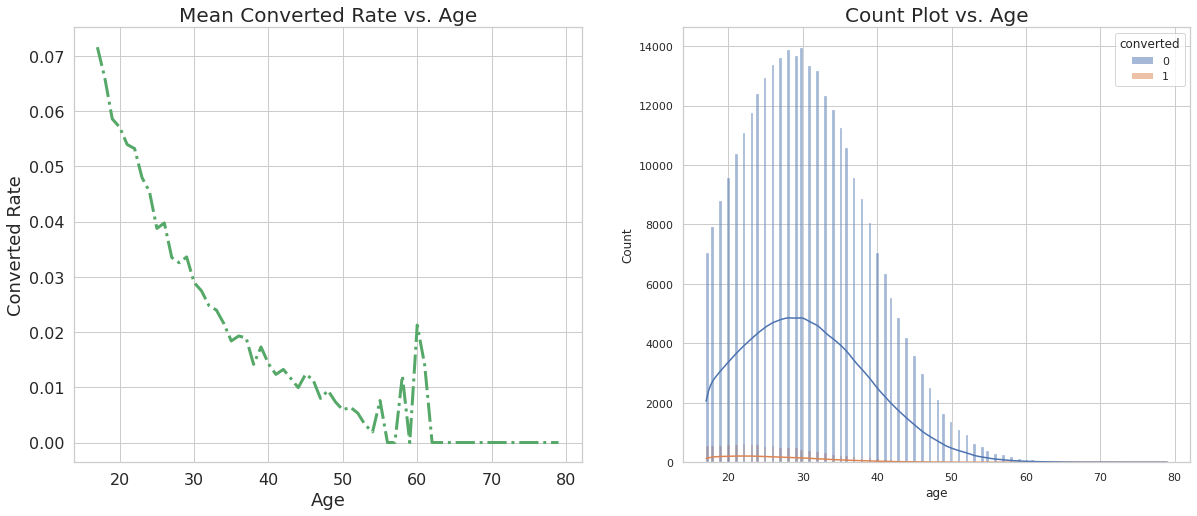

In [17]:
sns.set_theme(style = 'whitegrid')
fig, ax = plt.subplots(1,2, figsize= (20,8))
ax[0].plot(age_group['age'], age_group['converted'], '-.', linewidth=3, color = 'g')
ax[0].set_title('Mean Converted Rate vs. Age', fontsize=20)
ax[0].set_xlabel('Age', size=18)
ax[0].set_ylabel('Converted Rate', size=18)
ax[0].tick_params(axis='both', labelsize=16)
ax[0].grid(True)
sns.histplot(x=df_1['age'], hue = df_1['converted'], ax = ax[1], alpha=0.5, kde = True)
ax[1].set_title('Count Plot vs. Age', fontsize=20)
plt.show()

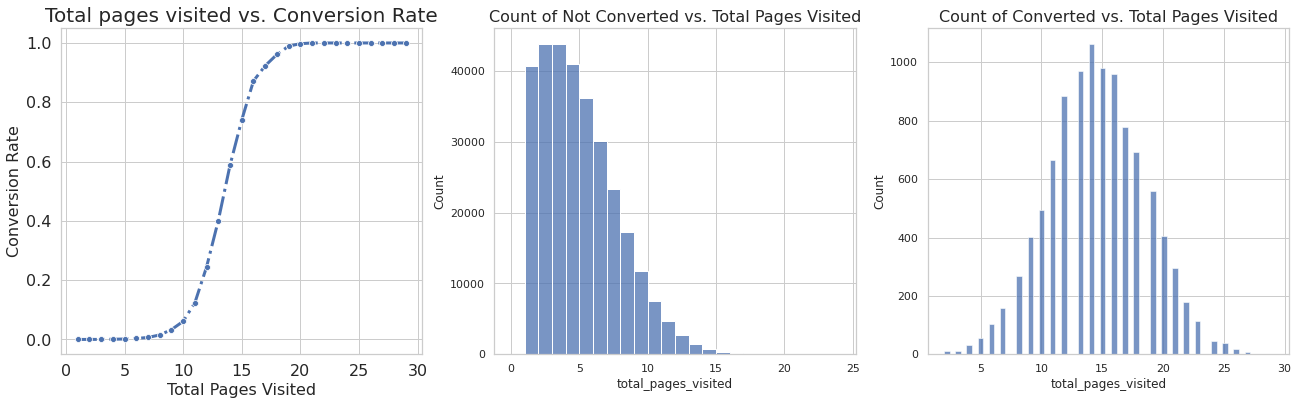

In [18]:
#Visualization of converted rate vs total pages visited
page_con = df_1[['total_pages_visited', 'converted']].groupby('total_pages_visited')['converted'].mean().reset_index()

fig, ax = plt.subplots(1,3, figsize=(22,6))
sns.lineplot(x = page_con['total_pages_visited'], y=page_con['converted'], ax=ax[0], dashes=True, marker='o', linestyle = '-.', linewidth =3)
ax[0].set_title('Total pages visited vs. Conversion Rate', fontsize=20)
ax[0].set_ylabel('Conversion Rate', size=16)
ax[0].set_xlabel('Total Pages Visited', size=16)
ax[0].tick_params(axis='both', labelsize=16)
sns.histplot(x=df_1[df_1['converted']==0]['total_pages_visited'], ax=ax[1], bins=np.arange(0,25))
ax[1].set_title('Count of Not Converted vs. Total Pages Visited', fontsize =16)
sns.histplot(x=df_1[df_1['converted']==1]['total_pages_visited'], ax=ax[2])
ax[2].set_title('Count of Converted vs. Total Pages Visited', fontsize =16)
plt.show()

# Data Preprocessing

In [19]:
df_1.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [20]:
df_2 = pd.get_dummies(df_1, drop_first=True)
X = df_2.drop('converted', axis=1)
Y = df_2['converted']
X.shape, Y.shape

((316198, 8), (316198,))

# Machine Learning

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report

I am picking random forests model to predict conversion rate, and the main reasons are:

- It is more robust than a single decision tree, and less likely to overfit on the training data.
- It offers a really good idea of which features are more important to help me analyze and give recommendations.
- I can tune parameter 'class_weight' in random forests to handle with imbalanced classes.
- OOB error can be viewd as a valid estimate of the test error which is convenient when performing cross-validation on large data set would be computationally cumbersome.

In [22]:
# Split dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((221338, 8), (94860, 8), (221338,), (94860,))

In [23]:
# Establish baseline model that aims to exceed
baseline_preds = 0 # majority class is not converted
baseline_errors = round(1-abs((baseline_preds - y_test).mean()),4)*100
print(f"Average baseline prediction accuracy: {baseline_errors}%")

Average baseline prediction accuracy: 96.8%


Actually, for imbalanced dataset, using accuracy as metric is not a smart way, but it still give us a sense for measuring model performance. I am going to utilize ROC curve and PR curve to evaluate the model.



In [24]:
# Select Random Forest as the model and train
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, class_weight='balanced')

# Range of class weight values to explore [0:(0.02-1), 1:(0.98-0)], use OOB error to tune class_weight
oob_error = []
for i in range(1, 51):
  rf.set_params(class_weight = {0: i*0.02, 1: 1-i*0.02})
  rf.fit(X_train, y_train)

  oob_error.append((i, 1 - rf.oob_score_))

In [25]:
# Generate the OOB error vs class weight plot
class_weight = []
oob = []
min_error = 1
min_error_idx = 0
for i in range(0,50):
  class_weight.append(oob_error[i][0])
  oob.append(oob_error[i][1])

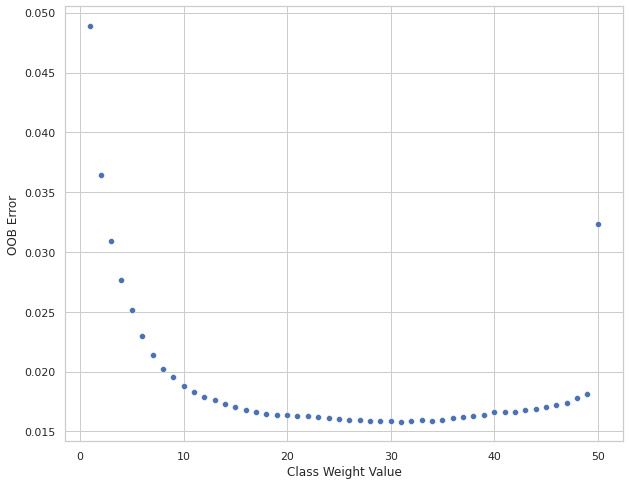

In [26]:
plt.figure(figsize=(10,8))
fig = sns.scatterplot(class_weight, oob)
fig.set_xlabel('Class Weight Value')
fig.set_ylabel('OOB Error')
plt.show()

In [43]:
oob_classw = pd.DataFrame(zip(class_weight, oob), columns=['class_weight', 'ood_error'])
oob_classw.iloc[30,]

class_weight    31.000000
ood_error        0.015831
Name: 30, dtype: float64

In [74]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, class_weight={0:0.62, 1:0.38})
rf.fit(X_train, y_train)
rf.oob_score_

0.9841690084847609

# Determine Performance Metrics

In [72]:
from sklearn.metrics import roc_curve
y_train_pred = rf.predict_proba(X_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_train_pred[:, 1])  #input is the positive result probability
auc_train = auc(fpr_train,tpr_train) #auc area

y_test_pred = rf.predict_proba(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred[:, 1])
auc_test = auc(fpr_test, tpr_test)

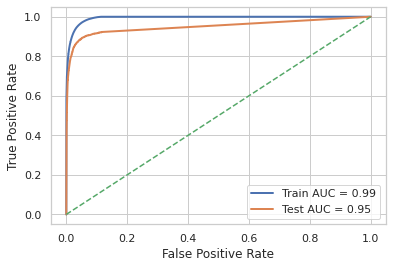

In [73]:
plt.plot(fpr_train, tpr_train, linewidth=2, label='Train AUC = %0.2f'% auc_train)
plt.plot(fpr_test, tpr_test, linewidth=2, label='Test AUC = %0.2f'% auc_test)
plt.plot([0,1],[0,1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.legend()

Here looking at the ROC curve (and the ROC AUC score), no matter on training set or test set, the classifier both perform well. The TPR here is the ratio of (postive)converted users that are correctly classified as converted group, which is large in this case. The FPR is the ratio of (negative) nonconverted users that are incorrectly classfied as (positive)converted, which is small here. However, due to the imbalancity of this data set, i.e. there are few converted users(positive) compared to the nonconverted ones(negative). Consequently, it makes sense that TPR will be large. Thus, I will look at another tool Precision-Recall curve to help me measure my model.

In [80]:
precision_train, recall_train, thresholds = precision_recall_curve(y_train, y_train_pred[:,1])
PR_auc_train = auc(recall_train, precision_train)
precision_test, recall_test, thresholds = precision_recall_curve(y_test, y_test_pred[:,1])
PR_auc_test = auc(recall_test, precision_test)


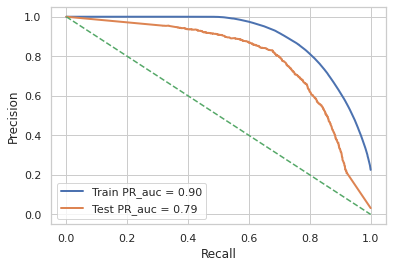

In [85]:
plt.plot(recall_train, precision_train, linewidth = 2, label = 'Train PR_auc = %.2f'%PR_auc_train)
plt.plot(recall_test, precision_test, linewidth = 2, label = 'Test PR_auc = %.2f'%PR_auc_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot([0,1], [1,0], '--')
plt.legend()

In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).



In [95]:
Y = []
for i in range(y_test_pred.shape[0]):
  if y_test_pred[i][0] > y_test_pred[i][1]:
    Y.append(0)
  else:
    Y.append(1)
y_pred = rf.predict(X_test)


94860

In [98]:
print(classification_report(y_test, Y))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91828
           1       0.84      0.65      0.73      3032

    accuracy                           0.98     94860
   macro avg       0.92      0.82      0.86     94860
weighted avg       0.98      0.98      0.98     94860



In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91828
           1       0.84      0.65      0.73      3032

    accuracy                           0.98     94860
   macro avg       0.92      0.82      0.86     94860
weighted avg       0.98      0.98      0.98     94860



It shows that for class converted, if we use the default cutoff 0.5, we can have a high precision (0.85), but a relative low recall 0.69, which means we classify 30% converted user as non-converted. In practice, we can choose a specific value for recall or precision by adjusting threshold according to our business goal. For example, if sales team and maketing team think that improving retention is our goal in this stage, then correctly identified converted users is more important, i.e. recall should be increased. On the other hand, if we tend to increase conversion rate of new users, then precision should be fully considered. In a nutshell, there has a trade-off between precision and recall.

# Feature Importance

In [100]:
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending = False)
feature_imp

total_pages_visited    0.788273
age                    0.130566
new_user               0.035311
country_UK             0.012881
country_US             0.012829
country_Germany        0.009149
source_Seo             0.006030
source_Direct          0.004961
dtype: float64

Text(0, 0.5, 'Features')

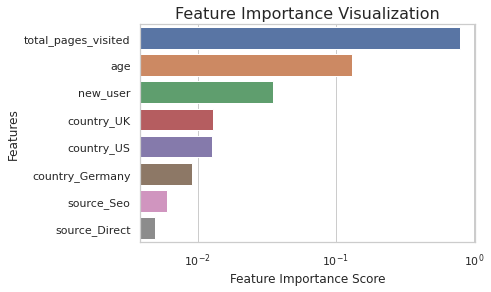

In [107]:
fig = sns.barplot(x = feature_imp, y = feature_imp.index)
fig.set_xscale('log')
plt.title('Feature Importance Visualization', size=16)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')


# Conclusion
Based on above model and data visualization, what I can contribute to the team members are:

Total pages visited is the most important one for conversion rate. This is reasonable and intuitive because users browsing many pages tends to buy something. They might have a goal so they need to visit mutiple pages and complete payment. What we should do first is to stimulate users without clear shopping goal to click, which means except for what they search, our website should offer more relative or close stuffs to users. Give them the right recommendations and result in more clicks, then they might want to buy, probably take action and finally be converted.

We've already known that two thirds of lookers are new users and the rest are repeat users, and probability of conversion of old users is nearly five times than that of new users. Thus, it is very important to retain old customers in order to fortify our business. Consequently, we should further focus on customer retention rate and make a trade-off between targetting old customers and finding new users for marketing and sale teams. Also, we can get some actionable insight by flirting some useful information from this dataset, for example, target new users with total pages visited over 15, analyze the reason why they don't buy what they visited, maybe they were comparing the price with other website or they might care for comments. If they are sensitive to promotions or coupon, then we can send them relative news and coupon. If they concern about comment, we can push them relevant products with top comments at a regular time.

It shows that our website is more easy to convert younger customers compared to people over 55yrs. Thus, for market teams, we should make our advertising exposure more targetd to this generation. Meanwhile, older people might be unwilling to shop online. I think we can evaluate if it is worth or not analyzing some typical user groups and try to identify the reason why they don't like to use our website. If it is actionable, we can update and correct it to convert more older users.

For variable country, we can see that China has the most impact among all four countries, which is comprehensible. We have analyzed before that there are many users in China, but mean conversion rate is extremely low. I think we should fully dig into user's shopping experience, because they are visiting our website and the number of users are huge, which means they are interested in what we sell and offer, but they don't take action. It shows that there maybe something wrong with our website in China, for example, delivery, return, exchange, translation and payment way, etc. This can not be solved by a simple A/B testing setup, we might try to analyze the user activity logs, conduct retrospective analysis or conduct user experience research. If we could figure out concrete reason, then conversion rate definitely might have a big improvement.

Users mainly originate from United States but their conversion rate is not number one. It is highly likely that our website is from US and people here may have a lot of options. We should try to guarantee the timeliness of website content to remain competitive on the market. Website in Germany has the fewest users but the highest conversion rate. It is a big opportunity for our website in Germany if we can expand our business due to high conversion rate. People in Germany trust our website and they are willing to buy, so we should seize the chance to increase exposure here.

Although how people come to our website is not that important compared to other variables, I still want to say that users who attracted by advertisement(Ads) have the highest mean conversion rate, which indicates if our advertisement system can target the potential customers precisely, then conversion performance will improve a lot.